In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
import ast
import networkx as nx
from scipy import linalg
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
%matplotlib inline
#%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
cor=pd.read_csv("./cor_matrix_hololive.csv")
cor=cor.set_index(cor.columns)

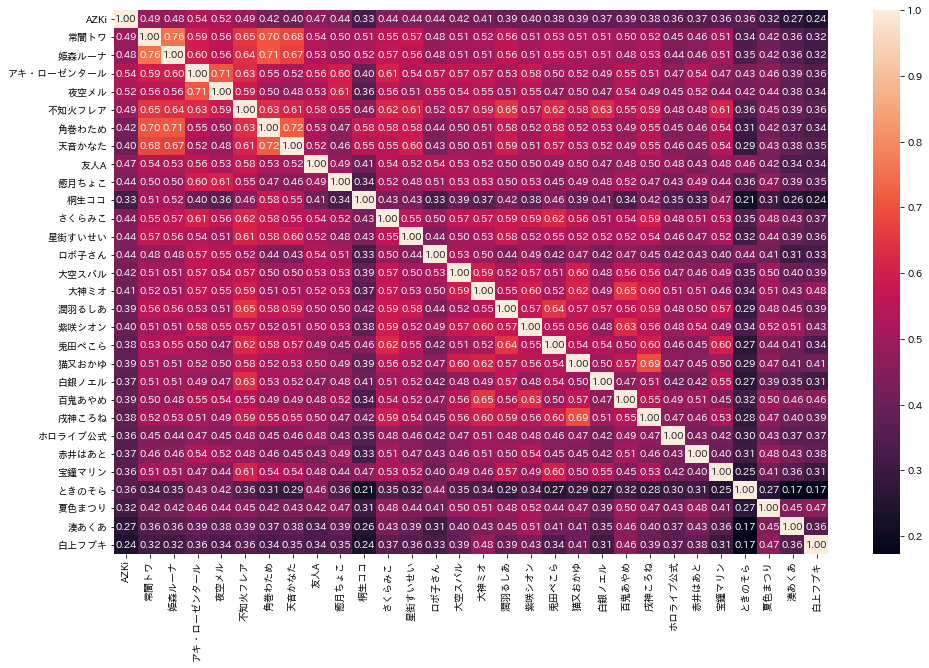

In [3]:
plt.figure(figsize=(16, 10))
sns.heatmap(cor,annot=True, fmt="1.2f")

In [4]:
#隣接行列
A=cor-np.diag([1 for _ in range(len(cor))])

#対角行列
D= np.diag(A.sum(axis=1))

#ラプラシアン行列
L = D-A

#正規化ラプラシアン行列
L_norm=((np.linalg.inv(D)**(1/2))) @ L @ ((np.linalg.inv(D)**(1/2)))

#固有値分解(昇順で結果が出る)
vals, vecs = linalg.eig(L_norm) 

In [5]:
result=pd.DataFrame()
result["name"]=cor.columns

# kmeans
kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(vecs[:,1:6])
result["clus1"]=kmeans.labels_

# spectral clustering
sc = SpectralClustering(6, affinity='precomputed', n_init=100,assign_labels='kmeans',random_state=0)
result["clus2"]=sc.fit_predict(A) 

In [6]:
result.sort_values(by=["clus1","clus2"])

,name,clus1,clus2
5,不知火フレア,0,1
11,さくらみこ,0,1
12,星街すいせい,0,1
16,潤羽るしあ,0,1
18,兎田ぺこら,0,1
20,白銀ノエル,0,1
25,宝鐘マリン,0,1
1,常闇トワ,1,2
2,姫森ルーナ,1,2
6,角巻わため,1,2


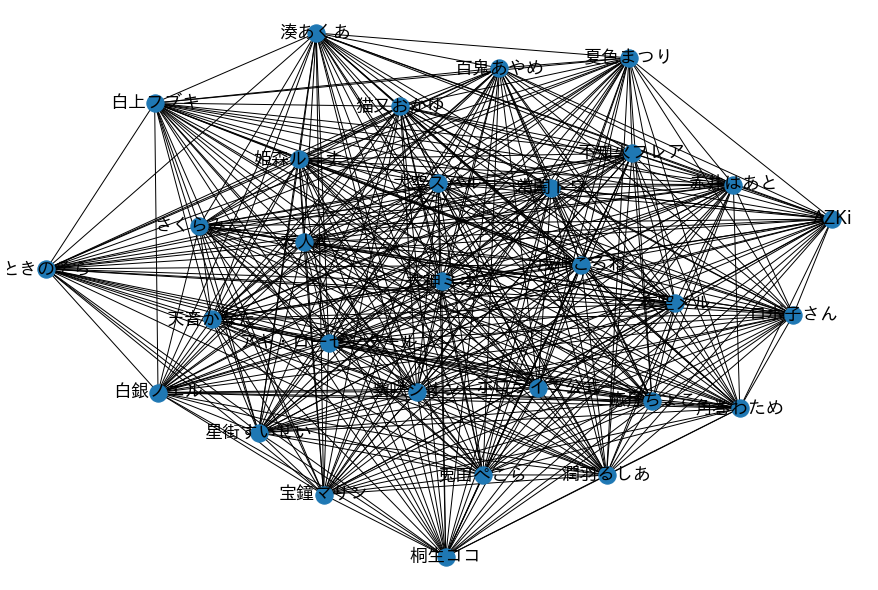

In [7]:
#ネットワーク表示用
G=nx.from_numpy_matrix(np.array(A))
labels={}
for num,i in enumerate(cor.columns):
    labels[num]=i

plt.figure(figsize=(12,8))
nx.draw(G, with_labels=True,labels=labels,font_family="IPAexGothic",font_size=18,font_color="black")